## Spatial autocorrelation

In [1]:
%matplotlib inline
import pandas as pd
import geopandas as gpd
import pysal as pys
import numpy as np
from shapely.geometry import Polygon
import libpysal 
from libpysal import weights
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from pysal.explore import esda

### Exercise 1

Read the mortality csv and country shapefile

In [2]:
#read the mortality csv file
mort = pd.read_csv("under5mortality.csv")
mort

,Unnamed: 0,ISO,Name,ChildMortality
0,1,AFG,Afghanistan,67.9
1,4,ALB,Albania,8.8
2,7,DZA,Algeria,24.0
3,10,AND,Andorra,3.3
4,13,AGO,Angola,81.1
...,...,...,...,...
191,574,VEN,Venezuela (Bolivarian Republic of)**,30.9
192,577,VNM,Viet Nam,20.9
193,580,YEM,Yemen,55.4
194,583,ZMB,Zambia,60.0


In [3]:
#read the country shapefile
countries = gpd.read_file("countries/ne_110m_admin_0_countries.shp")
countries

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,Fiji,FJI,...,피지,Fiji,Fidżi,Fiji,Фиджи,Fiji,Fiji,Fiji,斐濟,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,United Republic of Tanzania,TZA,...,탄자니아,Tanzania,Tanzania,Tanzânia,Танзания,Tanzania,Tanzanya,Tanzania,坦桑尼亚,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,Western Sahara,SAH,...,서사하라,Westelijke Sahara,Sahara Zachodnia,Saara Ocidental,Западная Сахара,Västsahara,Batı Sahra,Tây Sahara,西撒哈拉,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,Canada,CAN,...,캐나다,Canada,Kanada,Canadá,Канада,Kanada,Kanada,Canada,加拿大,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,United States of America,USA,...,미국,Verenigde Staten van Amerika,Stany Zjednoczone,Estados Unidos,Соединённые Штаты Америки,USA,Amerika Birleşik Devletleri,Hoa Kỳ,美国,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,Admin-0 country,1,5,Republic of Serbia,SRB,0,2,Sovereign country,Republic of Serbia,SRB,...,세르비아,Servië,Serbia,Sérvia,Сербия,Serbien,Sırbistan,Serbia,塞尔维亚,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,Admin-0 country,1,6,Montenegro,MNE,0,2,Sovereign country,Montenegro,MNE,...,몬테네그로,Montenegro,Czarnogóra,Montenegro,Черногория,Montenegro,Karadağ,Montenegro,蒙特內哥羅,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,Admin-0 country,1,6,Kosovo,KOS,0,2,Sovereign country,Kosovo,KOS,...,코소보,Kosovo,Kosowo,Kosovo,Республика Косово,Kosovo,Kosova,Kosovo,科索沃,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,Admin-0 country,1,5,Trinidad and Tobago,TTO,0,2,Sovereign country,Trinidad and Tobago,TTO,...,트리니다드 토바고,Trinidad en Tobago,Trynidad i Tobago,Trinidad e Tobago,Тринидад и Тобаго,Trinidad och Tobago,Trinidad ve Tobago,Trinidad và Tobago,千里達及托巴哥,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


Merge the mortality information to the country shapefile by a left join

In [4]:
#left-join merging of both files by country ISO
merged = pd.merge(countries, mort, left_on='ISO_A3',right_on='ISO', how='left')
merged

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry,Unnamed: 0,ISO,Name,ChildMortality
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,Fiji,FJI,...,Фиджи,Fiji,Fiji,Fiji,斐濟,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",181.0,FJI,Fiji,25.3
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,United Republic of Tanzania,TZA,...,Танзания,Tanzania,Tanzanya,Tanzania,坦桑尼亚,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",559.0,TZA,United Republic of Tanzania,54.0
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,Western Sahara,SAH,...,Западная Сахара,Västsahara,Batı Sahra,Tây Sahara,西撒哈拉,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN,NaN,NaN
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,Canada,CAN,...,Канада,Kanada,Kanada,Canada,加拿大,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",97.0,CAN,Canada,5.1
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,United States of America,USA,...,Соединённые Штаты Америки,USA,Amerika Birleşik Devletleri,Hoa Kỳ,美国,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",562.0,USA,United States,6.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,Admin-0 country,1,5,Republic of Serbia,SRB,0,2,Sovereign country,Republic of Serbia,SRB,...,Сербия,Serbien,Sırbistan,Serbia,塞尔维亚,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",460.0,SRB,Serbia,5.7
173,Admin-0 country,1,6,Montenegro,MNE,0,2,Sovereign country,Montenegro,MNE,...,Черногория,Montenegro,Karadağ,Montenegro,蒙特內哥羅,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",346.0,MNE,Montenegro,3.5
174,Admin-0 country,1,6,Kosovo,KOS,0,2,Sovereign country,Kosovo,KOS,...,Республика Косово,Kosovo,Kosova,Kosovo,科索沃,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",NaN,NaN,NaN,NaN
175,Admin-0 country,1,5,Trinidad and Tobago,TTO,0,2,Sovereign country,Trinidad and Tobago,TTO,...,Тринидад и Тобаго,Trinidad och Tobago,Trinidad ve Tobago,Trinidad và Tobago,千里達及托巴哥,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",532.0,TTO,Trinidad and Tobago,26.1


Getting rid of NaN values and resetting the index

In [5]:
data = merged.dropna(subset=['ChildMortality']).reset_index(drop=True)
data

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry,Unnamed: 0,ISO,Name,ChildMortality
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,Fiji,FJI,...,Фиджи,Fiji,Fiji,Fiji,斐濟,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",181.0,FJI,Fiji,25.3
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,United Republic of Tanzania,TZA,...,Танзания,Tanzania,Tanzanya,Tanzania,坦桑尼亚,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",559.0,TZA,United Republic of Tanzania,54.0
2,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,Canada,CAN,...,Канада,Kanada,Kanada,Canada,加拿大,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",97.0,CAN,Canada,5.1
3,Admin-0 country,1,2,United States of America,US1,1,2,Country,United States of America,USA,...,Соединённые Штаты Америки,USA,Amerika Birleşik Devletleri,Hoa Kỳ,美国,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",562.0,USA,United States,6.6
4,Admin-0 country,1,3,Kazakhstan,KAZ,0,2,Sovereign country,Kazakhstan,KAZ,...,Казахстан,Kazakstan,Kazakistan,Kazakhstan,哈萨克斯坦,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",265.0,KAZ,Kazakhstan,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,Admin-0 country,1,6,Macedonia,MKD,0,2,Sovereign country,Macedonia,MKD,...,Республика Македония,Makedonien,Makedonya Cumhuriyeti,Cộng hòa Macedonia,馬其頓共和國,"POLYGON ((22.38053 42.32026, 22.88137 41.99930...",520.0,MKD,The former Yugoslav Republic of Macedonia,13.7
160,Admin-0 country,1,5,Republic of Serbia,SRB,0,2,Sovereign country,Republic of Serbia,SRB,...,Сербия,Serbien,Sırbistan,Serbia,塞尔维亚,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",460.0,SRB,Serbia,5.7
161,Admin-0 country,1,6,Montenegro,MNE,0,2,Sovereign country,Montenegro,MNE,...,Черногория,Montenegro,Karadağ,Montenegro,蒙特內哥羅,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",346.0,MNE,Montenegro,3.5
162,Admin-0 country,1,5,Trinidad and Tobago,TTO,0,2,Sovereign country,Trinidad and Tobago,TTO,...,Тринидад и Тобаго,Trinidad och Tobago,Trinidad ve Tobago,Trinidad và Tobago,千里達及托巴哥,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",532.0,TTO,Trinidad and Tobago,26.1


Plot the world child mortality rate 

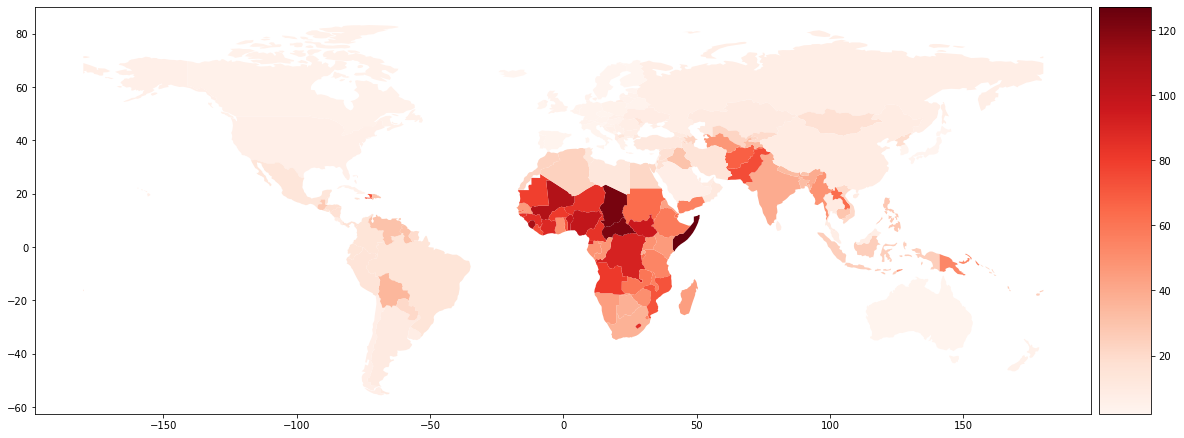

In [6]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, ax = plt.subplots(1, 1, figsize=(20,20))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
fig = data.plot(column='ChildMortality', cmap = "Reds", legend=True, categorical=False, ax=ax, cax = cax)


### Exercise 2

Prepare the contiguity weight matrix using rook weights, which consider neigbouring fields that share an edge

In [7]:
w_rook = weights.Rook.from_dataframe(data)
pd.DataFrame(w_rook.full()[0], index=data['ChildMortality'], columns=data['ChildMortality']).astype(int)

C:\Users\pvg499\Anaconda3\envs\geoanalysis\lib\site-packages\libpysal\weights\weights.py:167: UserWarning: The weights matrix is not fully connected: 
 There are 20 disconnected components.
 There are 15 islands with ids: 0, 18, 39, 40, 71, 82, 127, 128, 129, 130, 135, 138, 146, 150, 162.
  warnings.warn(message)


ChildMortality,25.3,54.0,5.1,6.6,10.0,22.5,53.4,25.4,10.4,7.4,...,58.5,61.7,49.0,37.9,5.7,13.7,5.7,3.5,26.1,96.4
ChildMortality,,,,,,,,,,,,,,,,,,,,,
25.3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54.0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
5.1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6.6,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10.0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13.7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5.7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,1,0,0
3.5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0


Plot the Rook weight matrix on the world shapefile 

Text(0.5, 1.0, 'Rook Weights')

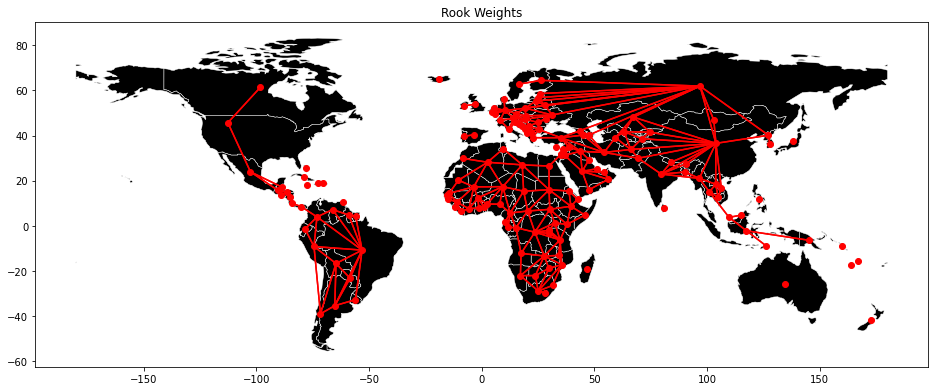

In [8]:
f, ax = plt.subplots(1, figsize=(16, 8))
data.plot(color='k', ax=ax, edgecolor='w', linewidth=0.5)
w_rook.plot(data, ax=ax, color='red')
ax.set_title('Rook Weights')

Calculate Moran'I for global child mortality using Rook weights

In [9]:
moran = esda.Moran(data['ChildMortality'], w_rook)
print("Moran\'s I for the global child mortality is " + str(moran.I))

('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 18, ' is an island (no neighbors)')
('WARNING: ', 39, ' is an island (no neighbors)')
('WARNING: ', 40, ' is an island (no neighbors)')
('WARNING: ', 71, ' is an island (no neighbors)')
('WARNING: ', 82, ' is an island (no neighbors)')
('WARNING: ', 127, ' is an island (no neighbors)')
('WARNING: ', 128, ' is an island (no neighbors)')
('WARNING: ', 129, ' is an island (no neighbors)')
('WARNING: ', 130, ' is an island (no neighbors)')
('WARNING: ', 135, ' is an island (no neighbors)')
('WARNING: ', 138, ' is an island (no neighbors)')
('WARNING: ', 146, ' is an island (no neighbors)')
('WARNING: ', 150, ' is an island (no neighbors)')
('WARNING: ', 162, ' is an island (no neighbors)')
Moran's I for the global child mortality is 0.739327439380855
